<a href="https://colab.research.google.com/github/Nuradilisayev/Data_science_course_codify/blob/master/Assigment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

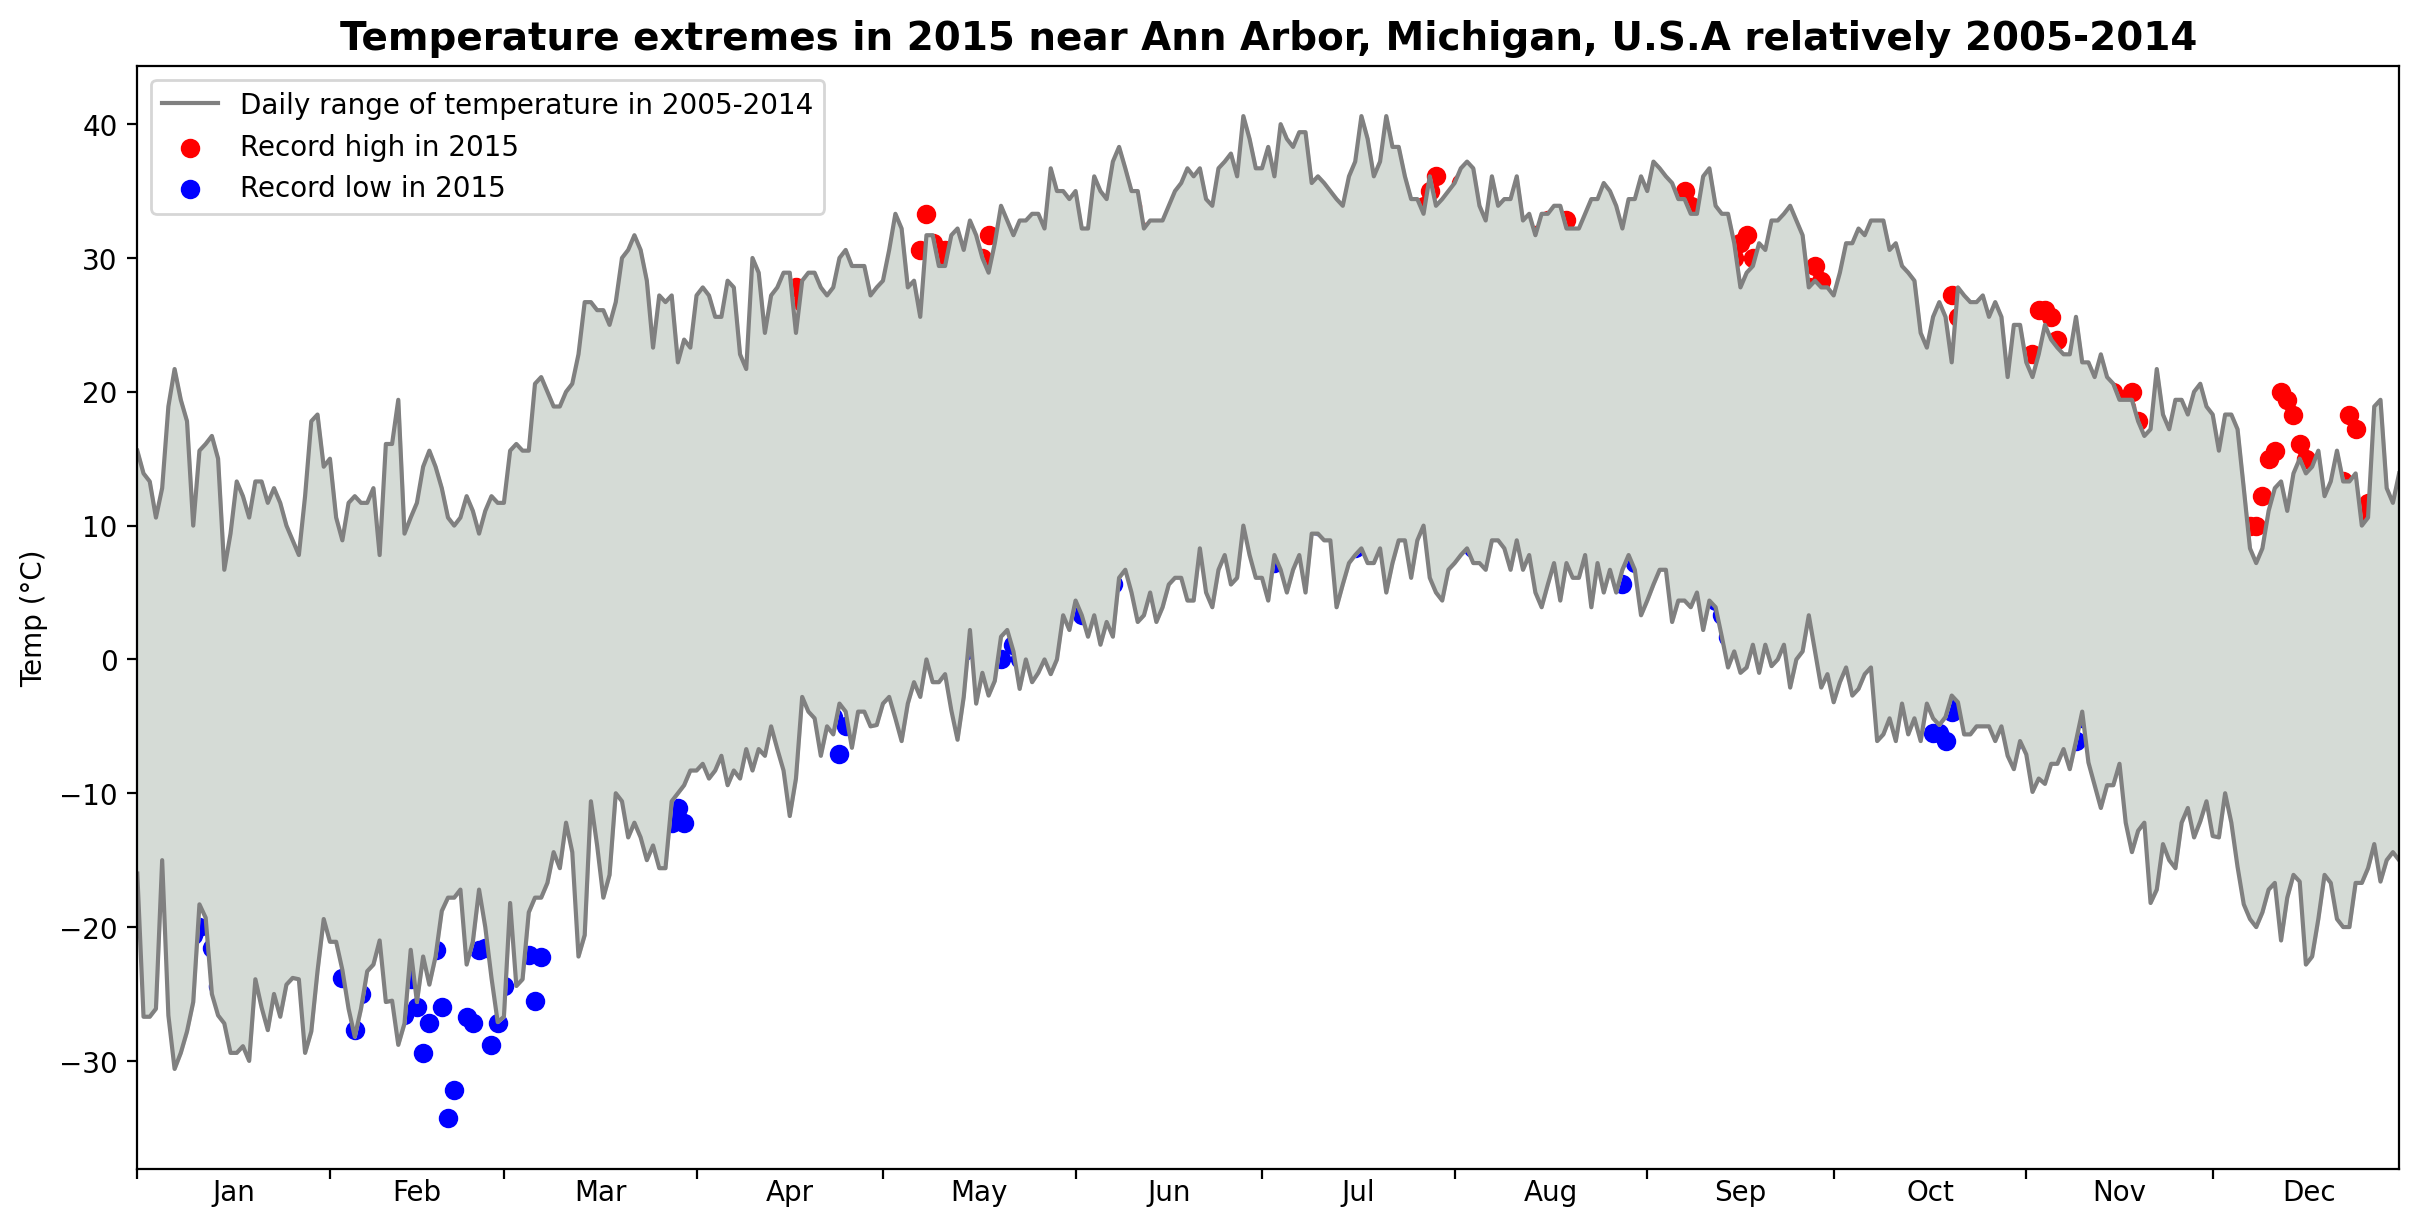

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
import numpy as np

df=pd.read_csv('/content/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

df['Date']=pd.to_datetime(df['Date'])
df['Data_Value']=df['Data_Value']/10

df1=df[(df['Date']>='2005-01-01') & (df['Date']<='2014-12-31')]

#df1['Date']=df1['Date'].dt.strftime('%b %d')

filter1=df1['Element']=='TMAX'
dfmax=df1[filter1]
dfmax=dfmax.rename(columns={'Data_Value':'Data_Value_Max'})
dfmax=dfmax.groupby('Date').agg({'Data_Value_Max':(max)})
dfmax=dfmax.reset_index()

filter2=df1['Element']=='TMIN'
dfmin=df1[filter2]
dfmin=dfmin.rename(columns={'Data_Value':'Data_Value_Min'})
dfmin=dfmin.groupby('Date').agg({'Data_Value_Min':(min)})
dfmin=dfmin.reset_index()

dfmerge=pd.merge(dfmax, dfmin, on='Date')
dfmerge=dfmerge.reset_index()
dfmerge['Date']=dfmerge['Date'].dt.strftime('%m %d')
dffin=dfmerge.groupby('Date').agg({'Data_Value_Max':(max),
                                   'Data_Value_Min':(min)})

dffin=dffin.reset_index()
dffin=dffin.sort_values(by='Date', ascending=1)
filter3=dffin['Date']!='02 29'
dffin=dffin[filter3]
dffin['Date']=pd.to_datetime(dffin['Date'], format = '%m %d')

df2=df[(df['Date']>='2015-01-01') & (df['Date']<='2015-12-31')]
fil1=df2['Element']=='TMAX'
df15max=df2[fil1]
df15max=df15max.rename(columns={'Data_Value':'Data_Value_MaxS'})
df15max=df15max.groupby('Date').agg({'Data_Value_MaxS':(max)})
df15max=df15max.reset_index()

fil2=df2['Element']=='TMIN'
df15min=df2[fil2]
df15min=df15min.rename(columns={'Data_Value':'Data_Value_MinS'})
df15min=df15min.groupby('Date').agg({'Data_Value_MinS':(min)})
df15min=df15min.reset_index()

df15=pd.merge(df15max, df15min, on='Date')
df15=df15.reset_index()

df15['Date']=df15['Date'].dt.strftime('%m %d')
df15=df15.groupby('Date').agg({'Data_Value_MaxS':(max),
                                   'Data_Value_MinS':(min)})
df15=df15.reset_index()
df15=df15.sort_values(by='Date', ascending=1)
fil3=df15['Date']!='02 29'
df15=df15[fil3]
df15['Date']=pd.to_datetime(df15['Date'], format = '%m %d')

fig, ax = plt.subplots(figsize=(12,6), dpi=200, facecolor='w', edgecolor='k', num=None)
plt.plot(dffin['Date'], dffin['Data_Value_Max'], linewidth=1.5, color='grey')
plt.plot(dffin['Date'], dffin['Data_Value_Min'],linewidth=1.5, color='grey', label='Daily range of temperature in 2005-2014')

plt.scatter(df15['Date'],df15['Data_Value_MaxS'], color='red',label='Record high in 2015')
plt.scatter(df15['Date'],df15['Data_Value_MinS'], color='blue',label='Record low in 2015')

ax.xaxis.set_major_locator(mdates.MonthLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_xticklabels([])
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
mticks = ax.get_xticks()
ax.set_xticks((mticks[:-1]+mticks[1:])/2, minor=True)
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xticklabels(labels, minor=True)
fig.tight_layout()
plt.margins(x = 0)
plt.title('Temperature extremes in 2015 near Ann Arbor, Michigan, U.S.A relatively 2005-2014', color='black', fontsize=14, ha='center',fontweight='bold')
plt.ylabel(u'Temp (\u00B0C)')
ax.legend()
plt.fill_between(dffin['Date'], dffin['Data_Value_Min'], dffin['Data_Value_Max'], color='#d5dbd6')
plt.show()

# Новый раздел